In [1]:
import import_ipynb
import g1_generate_dictionary as g1 
import numpy as np
import csv
import g3_plot_correlation as g3
import matplotlib.pyplot as plt
import math
from scipy.stats.stats import pearsonr  
import scipy.stats as ss

importing Jupyter notebook from g1_generate_dictionary.ipynb
importing Jupyter notebook from g3_plot_correlation.ipynb
importing Jupyter notebook from e2_extract_occ_original.ipynb
importing Jupyter notebook from c1_extract_paragraphe_issue.ipynb
importing Jupyter notebook from c2_extract_sentence_issue.ipynb
importing Jupyter notebook from g2_generate_correlation.ipynb
importing Jupyter notebook from e1_extract_occ_gen.ipynb


In [2]:
def open_file(file):
    list_file = []
    f = open(file)
    for x in csv.reader(f):
        list_file.append(x)
    
    return list_file[1:]


In [3]:
def extract_gen_number(number, generated):
    g = []
    for i in range(len(generated)):
        if(generated[i][0] == str(number)):
            g.append(generated[i])
    return g

In [4]:
def extract_orig_number(number, original):
    o = []
    for i in range(len(original)):
        if(original[i][0] == str(number)):
            o.append(original[i])
    return o


In [5]:
def compute_corr_coef(number, generated, original):
    gen_num = extract_gen_number(number, generated)
    orig_num = extract_orig_number(number, original)
    x = np.zeros((1,len(gen_num)))[0]
    y = np.zeros((1,len(gen_num)))[0]
    for i in range(len(gen_num)):
        x[i] += float(gen_num[i][2])
        y[i] += float(orig_num[i][2])
        #if(gen_num[i][2] != orig_num[i][2]):
         #   print(orig_num[i][1], orig_num[i][2], gen_num[i][2])
  
    x =  np.array(x).astype(np.float)
    y = np.array(y).astype(np.float)

    if(sum(x) == 0 and sum(y)==0):
        return 1


    else:
        return np.corrcoef(x,y, rowvar=True)[0][1]
        #return  pearsonr(x,y)[0]
        #return ss.spearmanr(x,y)[0]

In [16]:
def compute_corr():
    generated_occ = open_file("occurences_generated.csv")
    original_occ = open_file("occurences_original.csv")
    corr_coef = []
    list_issues = g3.find_issues_to_extract()
    x_axis = []
    y_axis = []
    k=0
    #list_test = [171,190,396,460,557,568]
    for i in range(45,594):
        if(i in list_issues):
            cc = compute_corr_coef(i, generated_occ, original_occ)
            if(not math.isnan(float(cc))):
                x_axis.append(i)
                y_axis.append(cc)
                corr_coef.append(cc)
                if(cc < 0.90):
                    k +=1
                    print(i,cc)
 
    print("Mean: ",np.mean(corr_coef))  
    print("Smaller than 0.90 : ", k)       
    return corr_coef, x_axis, y_axis


In [17]:
def compute_corr_num(number):
    generated_occ = open_file("occurences_generated.csv")
    original_occ = open_file("occurences_original.csv")
    corr_coef = []
    x_axis = []
    y_axis = []
    cc = compute_corr_coef(number, generated_occ, original_occ)
    corr_coef.append(cc)
    

    print( cc)

In [18]:
cc, x, y  = compute_corr()

52 0.8145776673914112
95 0.7452606635071103
98 0.8581495397636962
190 0.3976318404363966
352 0.8404098684653784
396 0.4438644592111774
460 0.47101897840996737
495 0.7390398309540578
529 0.8268444891849042
537 0.8596540727897812
545 0.8871201920847998
549 0.7982256352066076
557 0.6930932988917098
558 0.8246508307833398
568 0.5363110222346466
Mean:  0.977526175416726
Smaller than 0.90 :  15


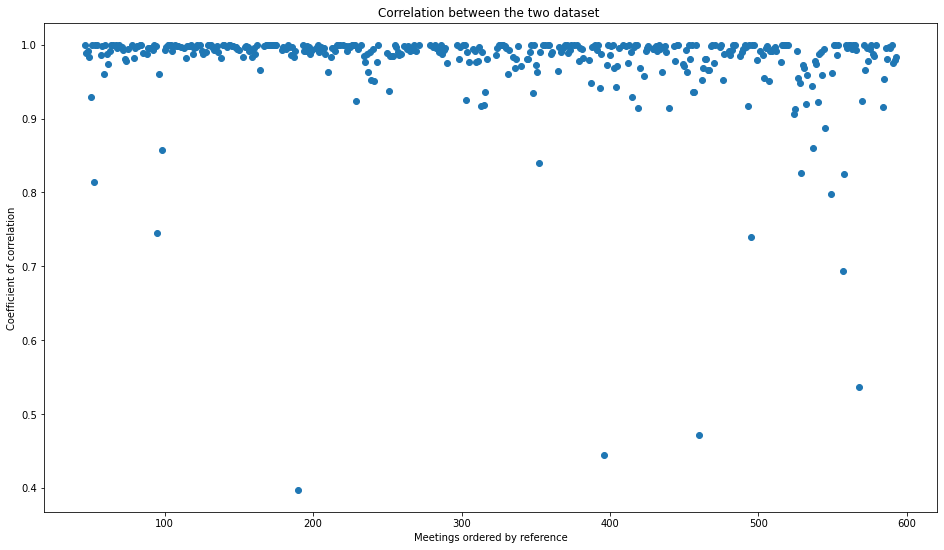

In [19]:

figsize = (16,9)
fig, ax = plt.subplots(1, 1, figsize=figsize)
ax.set_title('Correlation between the two dataset ')
ax.set_xlabel('Meetings ordered by reference')
ax.set_ylabel('Coefficient of correlation')
plt.scatter(x,y)
plt.show()

# < 0.95
    50 0.9135161442325354
        ZIMBABWE (us: 1 - 0), for the African Group (0 - 1), expressed hope that the AGBM 
        LUXEMBOURG (us :1 - 0), on behalf of the EU, recalled its proposal that "Annex X" Parties
        TANZANIA (us :1 - 0), on behalf of the G-77/CHINA, said that the basis for action and
    
    52 0.8145594570101952 OK (1 error - OECD)
    
    95 0.7452153110047833
        At COP-5, Argentina will make a commitment to lower emissions for the period 2008 to 2012
    
    98 0.8710606015207759
        GERMANY spoke on behalf of the EU, as well as Bulgaria, Croatia, Czech Republic, Hungary, Latvia, Poland, Romania and Slovenia.
    
    190 0.3973847821424101 LOWERCASE
    
    229 0.9244430945670001 DOUBLE CAPITAL 
         (ITALY : 1- 0) ITALY, for the EU, said developed countries must make a greater effort
         (MOROCCO : 1- 0) MOROCCO, for the G-77/CHINA, said adaptation and mitigation measures will be unsuccessful
         (OECD : 2 - 0)  Kiyotaka Akasaka, OECD Deputy Secretary-General, said OECD works with its member States to strengthen the use of market-based mechanisms to limit
         (TANZANIA : 2 - 0)  TANZANIA, for the LDCs, stressed the need to reach agreement at COP-9 on this issue.
    
    303 0.9476896946810917
        (G-77/CHINA : 3 - 2) G-77/CHINA preferring a 6:00 pm deadline except in extreme cases.
        (CHINA : 0 - 1)
        (EU : 6 - 3)the contribution of the EUï¿½s common agricultural and rural development
    
    313 0.9167211668995885 - - - - - - - - - - - 
        G77-CHINA : not easy 
    352 0.8403371649485859
        It abolishes the CDM levy and registration fee for projects in LDCs and 
    
    396 0.44383281122791063
        Xianfu Lu, UNFCCC Secretariat, explained that the NWP is a five-year programme to assist all parties, particularly least developed countries (LDCs) and                 small island developing states (SIDS) 
    
    440 0.9145326266040603 - - - - - - - - - - - 
        (US: 4 - 3 )he said that 43 LDCs have prepared NAPAs, but lamented that only US$176 million is available
        (TIMOR LESTE : 0 - 1) not even in text 
    460 0.4709919714341804 LOWERCASE
    
    495 0.7389790376721977
        (LDCs)On the board of the new fund, a number of developing countries insisted that it refer to representation for SIDS and LDCs.
    
    525 0.9133371968684758
        (LDCs : 0 - 7)The Gambia, for LDCs, called for operationalizing a more efficient and equitable international financial mechanism
    
    529 0.8250882805142544
        (LDCs : 0 - 5) The Gambia, for LDCs, expressed disappointment that work on national
    
    537 0.8593421970948462 LOWERCASE
        Switzerland, for the EIG, said that work on issues needing further consideration should start immediately.
    
    545 0.8850055457455158 LOWERCASE
        Ecuador, for the ALBA, expressed concern with the lack of fulfillment of the legal mandate to achieve ambitious emission reductions.

    557 0.6904198510447099
        CUBA, on behalf of Algeria, Argentina, Brazil, China, Democratic Republic of the Congo, Ecuador, Egypt, India, Malaysia, Nicaragua, the Philippines, Saudi           Arabia and Venezuela, underscored the need
    
    558 0.8245118816028546 LOWERCASE
        Australia, for the UMBRELLA GROUP, emphasized that the second commitment period under the Kyoto Protocol 
    568 0.5361709227707101 LOWERCASE 
    
    549 0.7957506945286625  LOWERCASE
        The Democratic Republic of the Congo, also for Algeria, Argentina, Bolivia, China, Cuba, Ecuador, Egypt, El Salvador, India, Iraq, Kuwait, Malaysia, Nicaragua, Philippines, Saudi Arabia, Sri Lanka, Sudan, Thailand and Venezuela, said termination of the AWG-LCA in 


251 0.9378065382044751



315 0.9182410105947666

316 0.9358914894133675

348 0.9352644884724743

404 0.9432444992980896

415 0.9307031581062901

419 0.9137767219420501

456 0.9357599233454678

457 0.9360113597422518

493 0.9222950982306971

524 0.913026401897375



528 0.9485421539386424



532 0.9200921012400418

536 0.9458940203911278



540 0.9238968698110973



570 0.9282175620443865

584 0.9143596703247598
